In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/SRTINNI/Desktop/algo trial/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Date'>

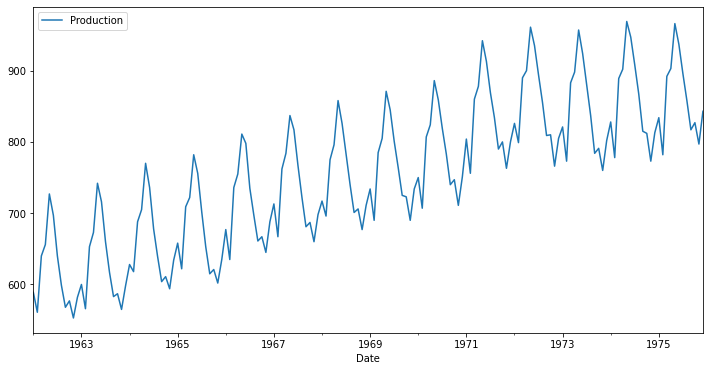

In [4]:
df.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\SRTINNI\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


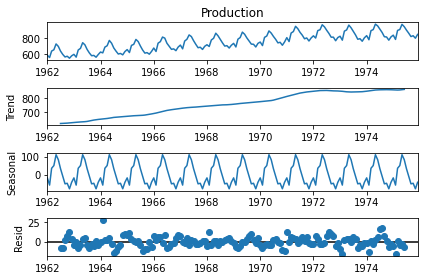

In [6]:
results = seasonal_decompose(df['Production'])
results.plot();

In [7]:
len(df)

168

In [7]:
train = df.iloc[:156]
test = df.iloc[156:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [11]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [14]:
!pip install keras

In [19]:
!pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=84117d63dd6fdaff6ffacd198259bb3967968489ffad9416a703e9264e23e101
  Stored in directory: c:\users\srtinni\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [23]:
X.shape

(1, 3, 1)

In [24]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 3s 6ms/step - loss: 0.0439
Epoch 2/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0238
Epoch 3/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0197
Epoch 4/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0171
Epoch 5/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0113
Epoch 6/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0100
Epoch 7/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0062
Epoch 8/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 9/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0041
Epoch 10/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0044
Epoch 11/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0042
Epoch 12/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 13/50
144/144 [====

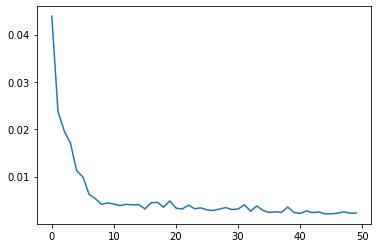

In [29]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [30]:
last_train_batch = scaled_train[-12:]

In [31]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [32]:
model.predict(last_train_batch)

array([[0.66691446]], dtype=float32)

In [33]:
scaled_test[0]

array([0.67548077])

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [35]:
test_predictions

[array([0.66691446], dtype=float32),
 array([0.6447559], dtype=float32),
 array([0.83446515], dtype=float32),
 array([0.9139461], dtype=float32),
 array([1.0242618], dtype=float32),
 array([1.0068722], dtype=float32),
 array([0.9306284], dtype=float32),
 array([0.82416093], dtype=float32),
 array([0.7079743], dtype=float32),
 array([0.6620741], dtype=float32),
 array([0.6048645], dtype=float32),
 array([0.6502489], dtype=float32)]

In [36]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [37]:
true_predictions = scaler.inverse_transform(test_predictions)

In [38]:
test['Predictions'] = true_predictions

<ipython-input-38-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

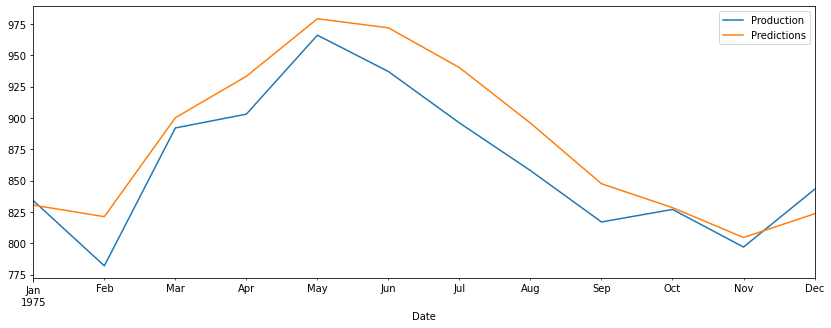

In [39]:
test.plot(figsize=(14,5))

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)


26.876918139626014
